In [2]:
from oauthlib.oauth2 import BackendApplicationClient
from requests_oauthlib import OAuth2Session
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt

In [122]:
CLIENT_ID = "c5705019-15c1-4086-abcf-a126b2310aaa"
CLIENT_SECRET = "6S!PoWWEBEBKVv5uGr]//DoX[3HE^dlwi,P5|71:"

In [123]:
# set up credentials
client = BackendApplicationClient(client_id=CLIENT_ID)
oauth = OAuth2Session(client=client)

# get an authentication token
token = oauth.fetch_token(token_url='https://services.sentinel-hub.com/oauth/token',
                          client_id=CLIENT_ID, client_secret=CLIENT_SECRET)

In [25]:
bbox = [98.821319,
        18.604601,
        99.222389,
        18.890695]
start_date = "2023-03-04"
end_date = "2023-04-04"
collection_id = "sentinel-2-l2a"

In [79]:
# evalscript
evalscript = """
//VERSION=3

function setup() {
  return {
    input: ["B02", "B03", "B04"],
    output: { bands: 3 }
  };
}

function evaluatePixel(sample) {
  return [2.5 * sample.B04, 2.5 * sample.B03, 2.5 * sample.B02];
}
"""

In [80]:
# request body/payload
json_request = {
    'input': {
        'bounds': {
            'bbox': bbox,
            'properties': {
                'crs': 'http://www.opengis.net/def/crs/OGC/1.3/CRS84'
            }
        },
        'data': [
            {
                'type': 'S2L2A',
                'dataFilter': {
                    'timeRange': {
                        'from': f'{start_date}T00:00:00Z',
                        'to': f'{end_date}T23:59:59Z'
                    },
                    'mosaickingOrder': 'leastCC',
                },
            }
        ]
    },
    'output': {
        'width': 512,
        'height': 385.361,
        'responses': [
            {
                'identifier': 'default',
                'format': {
                    'type': 'image/jpeg',
                }
            }
        ]
    },
    'evalscript': evalscript
}

In [81]:
# Set the request url and headers
url_request = 'https://services.sentinel-hub.com/api/v1/process'
headers_request = {
    "Authorization" : "Bearer %s" %token['access_token']
}

#Send the request
response = oauth.request(
    "POST", url_request, headers=headers_request, json = json_request
)

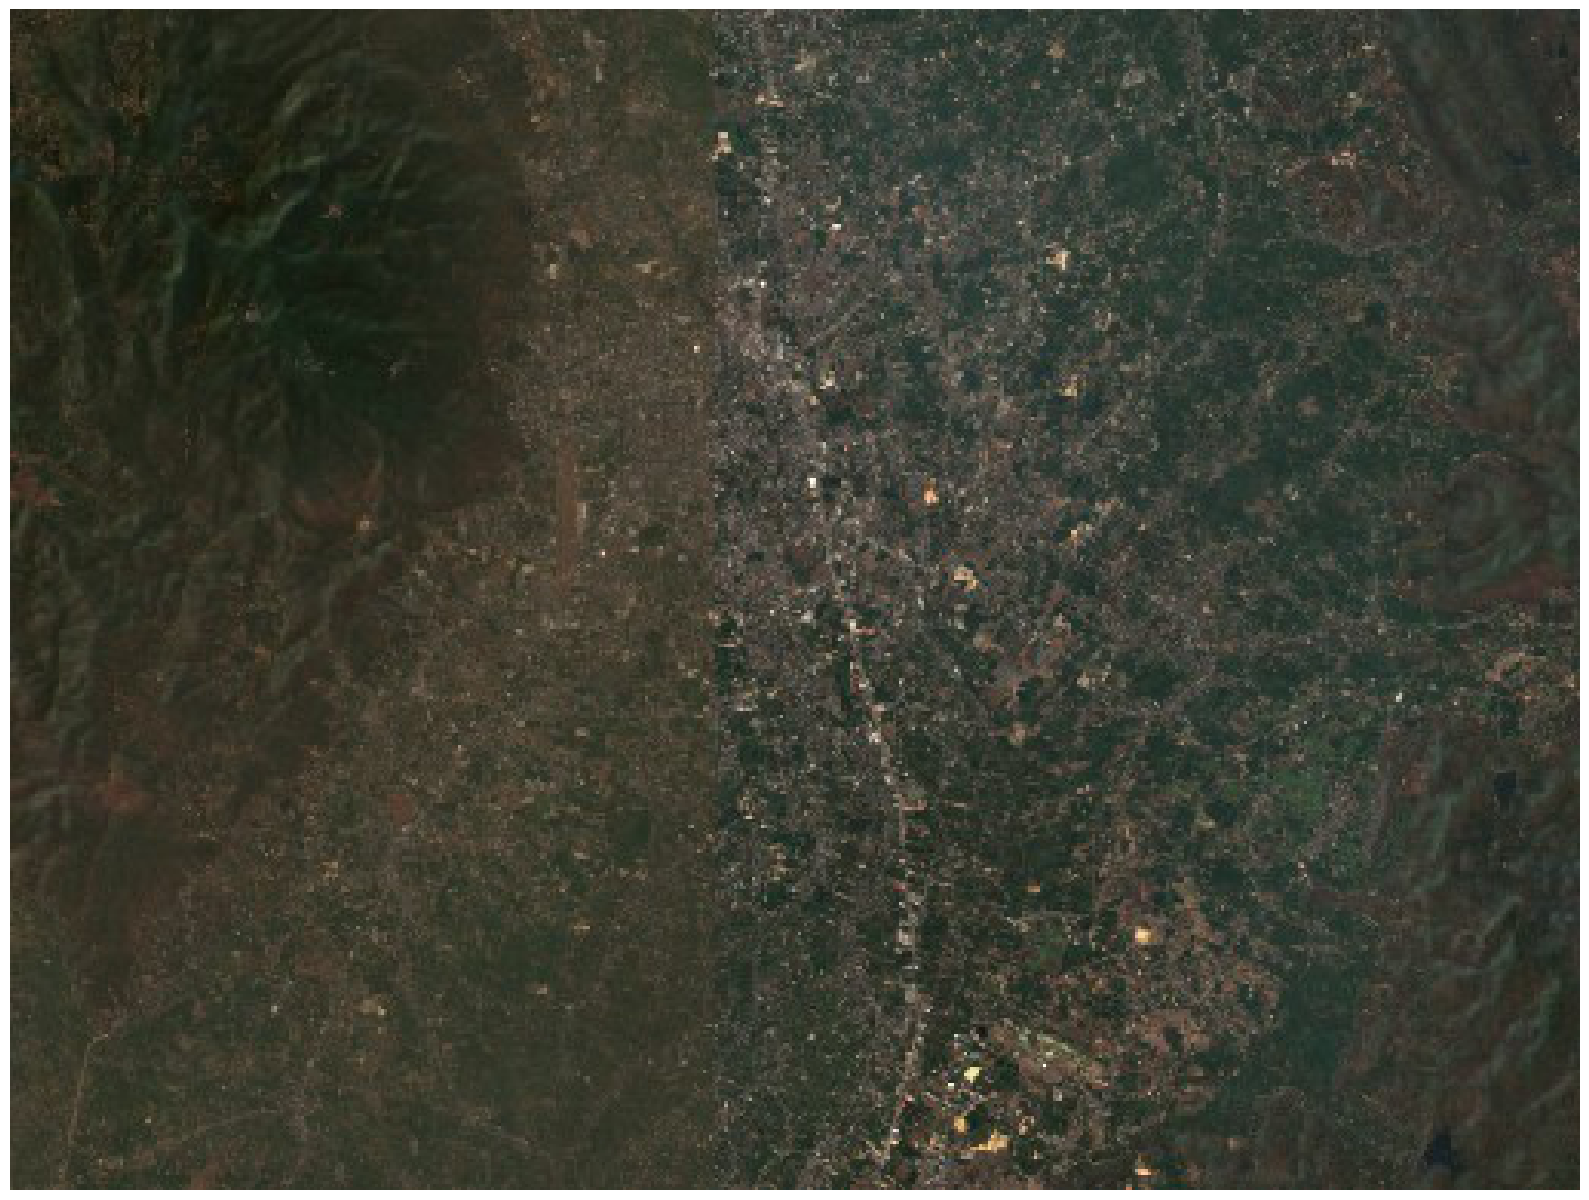

In [82]:
# read the image as numpy array
image_arr = np.array(Image.open(io.BytesIO(response.content)))

# plot the image for visualization
plt.figure(figsize=(16,16))
plt.axis('off')
plt.tight_layout()
plt.imshow(image_arr)

In [34]:
json_search = {
    'bbox': bbox,
    'datetime': f'{start_date}T00:00:00Z/{end_date}T23:59:59Z',
    'collections': [collection_id],
    'limit': 1
}

In [35]:
# set the url and headers
url_search = 'https://services.sentinel-hub.com/api/v1/catalog/search'
headers_search = {
  'Content-Type': 'application/json'
}

# send the request
response_search = oauth.request(
    "POST", url_search, headers=headers_search, json = json_search
)

In [ ]:
response_search.json()

In [124]:
evalscript = """
//VERSION=3

function setup() {
  return {
    input: ["B02", "B03", "B04"],
    output: { bands: 3 }
  };
}

function evaluatePixel(sample) {
  return [2.5 * sample.B04, 2.5 * sample.B03, 2.5 * sample.B02];
}
"""

In [131]:
# request body/payload
json_request = {
    'input': {
        'bounds': {
            "bbox": [
                    98.94283,
                    18.752098,
                    99.015627,
                    18.814343
                ],
            'properties': {
                'crs': 'http://www.opengis.net/def/crs/OGC/1.3/CRS84'
            }
        },
        "data": [
            {
                "dataFilter": {
                "timeRange": {
                    "from": "2023-02-01T00:00:00Z",
                    "to": "2023-05-19T23:59:59Z"
                }
                },
                "type": "landsat-ot-l2"
            }
        ]
    },
    'output': {
        'width': 512,
        'height': 462.326,
        'responses': [
            {
                'identifier': 'default',
                'format': {
                    'type': 'image/jpeg',
                }
            }
        ]
    },
    'evalscript': evalscript
}

In [132]:
# Set the request url and headers
url_request = 'https://services.sentinel-hub.com/api/v1/process'
headers_request = {
    "Authorization" : "Bearer %s" %token['access_token']
}

#Send the request
response = oauth.request(
    "POST", url_request, headers=headers_request, json = json_request
)



In [133]:
# read the image as numpy array
image_arr = np.array(Image.open(io.BytesIO(response.content)))

# plot the image for visualization
plt.figure(figsize=(16,16))
plt.axis('off')
plt.tight_layout()
plt.imshow(image_arr)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f7f8da54950>